# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 5</center>

# <center>Feature Engineering</center>

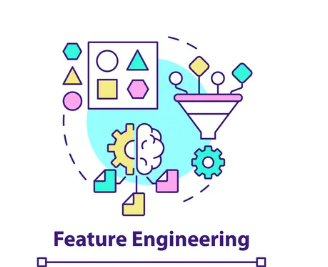

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Imputing Numerical Features </li>
<li> Detecting Outlier</li>
<li> Feature Transformation</li>
<li> Feature Scaling </li>
<li> Working with Categorical Features </li>
<li> Combine Features</li>
</ol>

## 0. Learning Objectives

Implement Numerical feature engineering techniques such as outlier detection, feature transformation, and feature scaling.

By the end of the lab, you should be able to :
- Apply required feature engineering techniques to given dataset.


- Prepare features for traning machine learning model.

# 1. Imputing Numerical  Features using sklearn

Instructions:

- Load data from loan_train.csv file. Create a dataframe names `ndf` which contains only numerical features. Default datatype of `Dependents` feature is `object`. Do you think it should be numerical feature? Justify your answer.


- Use sklearn SimpleImputer to Impute the missing values using most suitable strategy.



In [1]:
# Write your solution here

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('loan_train.csv')
df.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [2]:
ndf = df.select_dtypes(include=['int64', 'float64'])
ndf.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

Default datatype of Dependents feature is object but it should be in numirical because dependents basically counts how many dependents he/she has which is numrical in nature.

In [3]:
ndf.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')
data = impute.fit_transform(ndf)
data

array([[5.84900000e+03, 0.00000000e+00, 1.46412162e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 1.50800000e+03, 1.28000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [3.00000000e+03, 0.00000000e+00, 6.60000000e+01, 3.60000000e+02,
        1.00000000e+00],
       ...,
       [8.07200000e+03, 2.40000000e+02, 2.53000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [7.58300000e+03, 0.00000000e+00, 1.87000000e+02, 3.60000000e+02,
        1.00000000e+00],
       [4.58300000e+03, 0.00000000e+00, 1.33000000e+02, 3.60000000e+02,
        0.00000000e+00]])

In [5]:
# Verify whether imputation is done or not

ddf = pd.DataFrame(data, columns=ndf.columns)
ddf.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [6]:
# ndf.shape

# 2. Outlier Detection

Instructions:

- Choose any one numerical feature and check if there is any outliers.


- Use both inter quartile range method and standard deviation method to remove outliers in the dataset.

1)Inter Quartile Range

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


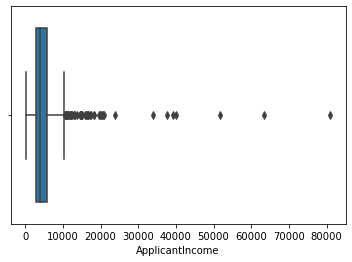

In [7]:
#Write your solution here
# Before
import matplotlib.pyplot as plt
import seaborn as sns

y = ddf['ApplicantIncome']
sns.boxplot(y)
plt.show()

In [8]:
Q1 = ddf.ApplicantIncome.quantile(0.25)
Q3 = ddf.ApplicantIncome.quantile(0.75)

IQR = Q3-Q1

upperlimit = Q3 + (IQR*1.5)
lowerlimit = Q1 - (IQR*1.5)


In [9]:
newdf=ddf[(ddf.ApplicantIncome > lowerlimit) & (ddf.ApplicantIncome < upperlimit)]
newdf.shape
          

(564, 5)

In [10]:
deletedindex = ddf[(ddf.ApplicantIncome < lowerlimit) | (ddf.ApplicantIncome > upperlimit)]
deletedindex.shape

(50, 5)

In [11]:

deletedindex.index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

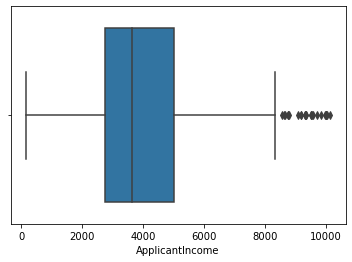

In [12]:
# After
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(newdf['ApplicantIncome'])

2) Standard deviation

In [13]:
std = ddf.ApplicantIncome.std()
mean = ddf.ApplicantIncome.mean()

upperlimit = mean + (3 * std)
lowerlimit = mean - (3 * std)

In [14]:
std_df=ddf[(ddf.ApplicantIncome > lowerlimit) & (ddf.ApplicantIncome < upperlimit)]
std_df.shape

(606, 5)

C:\Users\Tandin Jamtsho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

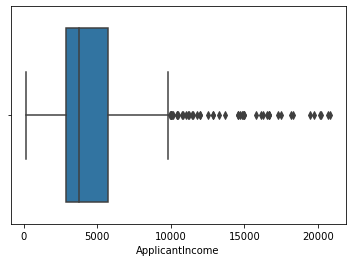

In [15]:
# AFter using standard deviation
sns.boxplot(std_df['ApplicantIncome'])

## 3. Feature Transformation

Instructions:

- Use an appropriate graph to explore the distribution of each numeric feature. 



- Choose any one feature that needs to apply feature transformation. Apply each feature transformation technique and justify which feature transformation technique is suitable for the chosen feature.

Finding feature distribution on each numeric features

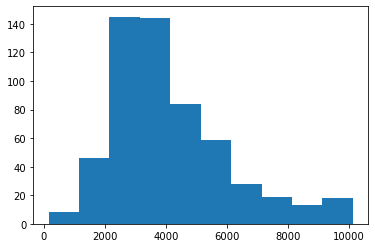

In [16]:
# Write your solution here
import numpy as np
plt.hist(newdf['ApplicantIncome'])
plt.show()


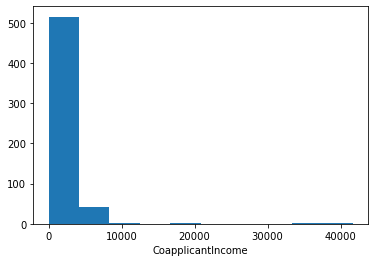

In [17]:
plt.hist(newdf.CoapplicantIncome, bins=10)
plt.xlabel("CoapplicantIncome")
plt.show()

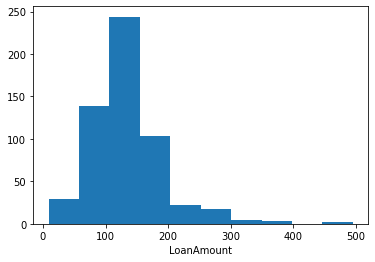

In [18]:
plt.hist(newdf.LoanAmount, bins=10)
plt.xlabel("LoanAmount")
plt.show()

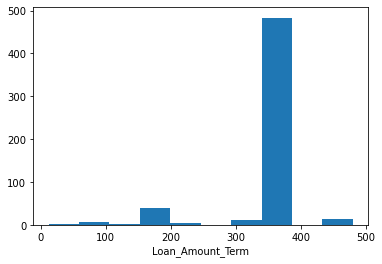

In [19]:
plt.hist(newdf.Loan_Amount_Term, bins=10)
plt.xlabel("Loan_Amount_Term")
plt.show()

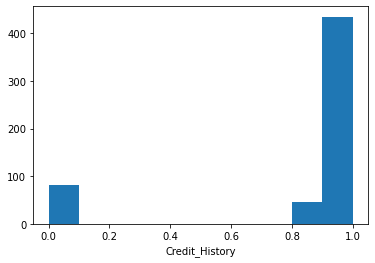

In [20]:
plt.hist(newdf.Credit_History, bins=10)
plt.xlabel("Credit_History")
plt.show()

Features Transformation

1) logarithmic Transformation on ApplicationAmount

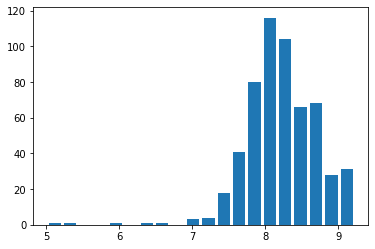

In [21]:
lt=np.log(newdf['ApplicantIncome'])
plt.hist(lt, bins=20, rwidth=0.8)
plt.show()

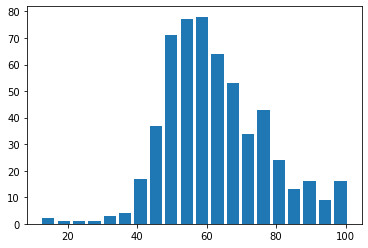

In [22]:
lt=np.sqrt(newdf['ApplicantIncome'])
plt.hist(lt, bins=20, rwidth=0.8)
plt.show()

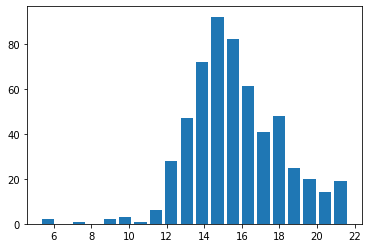

In [23]:
lt=np.cbrt(newdf['ApplicantIncome'])
plt.hist(lt, bins=20, rwidth=0.8)
plt.show()

In [24]:
# lt=np.exp(newdf['ApplicantIncome'])
# plt.hist(lt, bins=20, rwidth=0.8)
# plt.show()

## 4. Feature Scaling

Instructions:


- Use all feature scaling techniques to scale all the numerical features in the given datasets and observe the difference in the scaled features when you use different scaling techniques.


In [25]:
# Write your solution here
# Min Max Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
sc1 = scaler.fit_transform(newdf)

minmax = pd.DataFrame(sc1, columns = newdf.columns)
minmax.head()


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.570528           0.000000    0.282741           0.74359   
1         0.443788           0.036192    0.244856           0.74359   
2         0.285314           0.000000    0.117284           0.74359   
3         0.243568           0.056592    0.228395           0.74359   
4         0.585644           0.000000    0.271605           0.74359   

   Credit_History  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [26]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc2 = scaler.fit_transform(newdf)

In [27]:
std = pd.DataFrame(sc2, columns = newdf.columns)
std.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.895597          -0.568535    0.209517           0.27907   
1         0.238031          -0.061915   -0.107911           0.27907   
2        -0.584187          -0.568535   -1.176802           0.27907   
3        -0.800778           0.223647   -0.245833           0.27907   
4         0.974028          -0.568535    0.116211           0.27907   

   Credit_History  
0        0.453286  
1        0.453286  
2        0.453286  
3        0.453286  
4        0.453286

In [28]:
# Robust Scaler

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
sc3  = scaler.fit_transform(newdf)

In [29]:
robust = pd.DataFrame(sc3, columns = newdf.columns)
robust.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.975292          -0.601412    0.351934               0.0   
1         0.416722           0.043860    0.034483               0.0   
2        -0.281712          -0.601412   -1.034483               0.0   
3        -0.465696           0.407574   -0.103448               0.0   
4         1.041915          -0.601412    0.258621               0.0   

   Credit_History  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## 5. Categorical features


Instructions:


- Get all your categorical data in a new dataframe `cdf`. Refer your last class work on feature engineering on categorical features to make your categorical features ready for tranning machine learning model.

In [30]:
# Write your solution here
import pandas as pd
df1 = pd.read_csv('loan_train.csv')
categorical_df = df1.select_dtypes(include = ['object','bool'])
categorical_df.head()


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [31]:
categorical_df.isna().sum()

Loan_ID           0
Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
data = impute.fit_transform(categorical_df)
data

array([['LP001002', 'Male', 'No', ..., 'No', 'Urban', 'Y'],
       ['LP001003', 'Male', 'Yes', ..., 'No', 'Rural', 'N'],
       ['LP001005', 'Male', 'Yes', ..., 'Yes', 'Urban', 'Y'],
       ...,
       ['LP002983', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002984', 'Male', 'Yes', ..., 'No', 'Urban', 'Y'],
       ['LP002990', 'Female', 'No', ..., 'Yes', 'Semiurban', 'N']],
      dtype=object)

In [33]:
cdf = pd.DataFrame(data, columns=categorical_df.columns)
cdf.drop(columns = 'Loan_ID', inplace =True)
cdf.isna().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

In [34]:
cdf.head()

Gender Married Dependents     Education Self_Employed Property_Area  \
0   Male      No          0      Graduate            No         Urban   
1   Male     Yes          1      Graduate            No         Rural   
2   Male     Yes          0      Graduate           Yes         Urban   
3   Male     Yes          0  Not Graduate            No         Urban   
4   Male      No          0      Graduate            No         Urban   

  Loan_Status  
0           Y  
1           N  
2           Y  
3           Y  
4           Y

In [35]:
cat_df=cdf.drop(deletedindex.index, axis=0)
cat_df.shape

(564, 7)

In [40]:
cat_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,  10,
            ...
            603, 605, 606, 607, 608, 609, 610, 611, 612, 613],
           dtype='int64', length=564)

In [37]:
# Encode nominal feature

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
nominal = ohe.fit_transform(cat_df[['Married', 'Gender', 'Self_Employed']]).toarray()
nominal

array([[1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 0., 1.],
       ...,
       [0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1.]])

In [38]:

features = ohe.get_feature_names_out

In [41]:
# create dataframe for nominal feature

nominaldf = pd.DataFrame(nominal,columns=features)
nominaldf.head()

TypeError: 'method' object is not iterable

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
ordinal = oe.fit_transform(cdf[['Property_Area', 'Education', 'Dependents']])
ordinaldf = pd.DataFrame(ordinal, columns =['Property_Area', 'Education', 'Dependents'])
ordinaldf

In [ ]:
cdf3 = pd.concat([cdf1,cdf2], axis=1)
cdf3.drop(['Gender','Married','Self_Employed'], axis=1, inplace=True)
cdf3.head()

## 6. Combine Features

Instructions:

- Create a new dataframe `alldf` which contains transformed categorical and numerical features ready for traning machine learning model.

In [ ]:
#Write your solution here
alldf = pd.concat([nominaldf, ordinaldf], axis=1)
alldf.head()
# alldf.isna().sum()


In [ ]:
alldf.shape

# <center>THANK YOU